In [714]:
#necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Cleaning, transforming and visualizing

## Data Wrangling:
### Ensure that in doing so, NAN values are dealt with appropriately

In [691]:
boston = load_boston()

In [692]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

target key will be our price variable

In [693]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

DESCR method will give us lots of information and column names

In [701]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

let's read boston data into a dataframe

In [702]:
boston_df= pd.DataFrame(boston.data)

In [703]:
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


let's read column names from feature_names and assign them as column names

In [704]:
boston_df.columns = boston.feature_names
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


make column names more understandable,rename columnnames

In [705]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [706]:
boston_df=boston_df.rename(columns={
                                'CRIM':'crime',
                                'ZN':'zone',
                                'INDUS':'non-retail',
                                'CHAS':'Charles_River',
                                'NOX':'nitrogen_oxide',
                                'RM':'rooms',
                                'AGE':'age',
                                'DIS':'distances',
                                'RAD':'highways_accessibility',
                                'TAX':'property_tax',
                                'PTRATIO':'pupil_teacher_ratio',
                                'LSTAT':'lower_status_population'
                               })

In [707]:
boston_df.columns

Index(['crime', 'zone', 'non-retail', 'Charles_River', 'nitrogen_oxide',
       'rooms', 'age', 'distances', 'highways_accessibility', 'property_tax',
       'pupil_teacher_ratio', 'B', 'lower_status_population'],
      dtype='object')

our y or target column is like this:

In [708]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

check shape

In [709]:
boston_df.shape

(506, 13)

In [710]:
boston_df.isnull().sum()

crime                      0
zone                       0
non-retail                 0
Charles_River              0
nitrogen_oxide             0
rooms                      0
age                        0
distances                  0
highways_accessibility     0
property_tax               0
pupil_teacher_ratio        0
B                          0
lower_status_population    0
dtype: int64

we can see dtypes and missing values with info method

In [711]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crime                    506 non-null    float64
 1   zone                     506 non-null    float64
 2   non-retail               506 non-null    float64
 3   Charles_River            506 non-null    float64
 4   nitrogen_oxide           506 non-null    float64
 5   rooms                    506 non-null    float64
 6   age                      506 non-null    float64
 7   distances                506 non-null    float64
 8   highways_accessibility   506 non-null    float64
 9   property_tax             506 non-null    float64
 10  pupil_teacher_ratio      506 non-null    float64
 11  B                        506 non-null    float64
 12  lower_status_population  506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


let's check the heqatmap for a correlation

In [712]:
corr=boston_df.corr()

a heatmap using this correlation matrix will help to catch something

see the distribution of houses ages

<AxesSubplot:xlabel='age', ylabel='Density'>

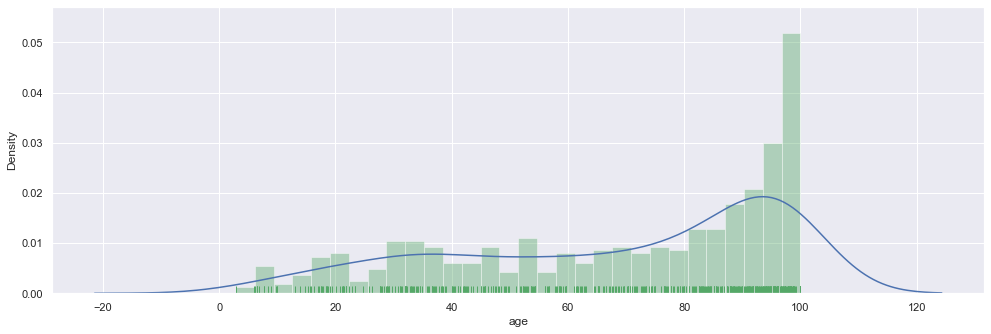

In [716]:
warnings.filterwarnings("ignore")
sns.set_theme()
sns.set(rc={'figure.figsize':(16.7,5.27)})
sns.distplot(boston_df.age,color='g',bins=30, rug=True,
                  kde_kws={"color": "b", "label": "KDE"})

ignore the warning above

##### explatory analysis of prices

let's see how many hoses we have atoun what price

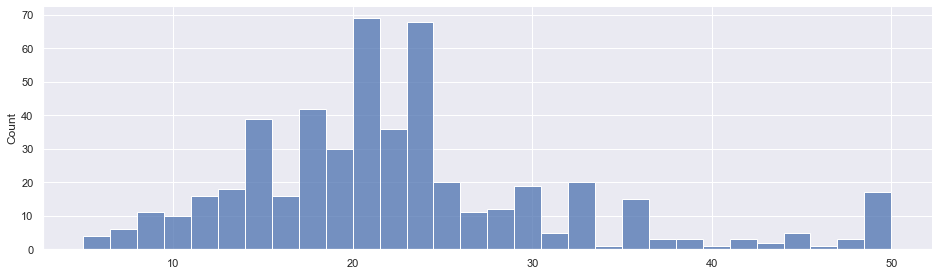

In [720]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.displot(y, bins=30,height=4, aspect=3.3)
plt.show()

distplot gives sasme graphy with  a curve on it, just for fun

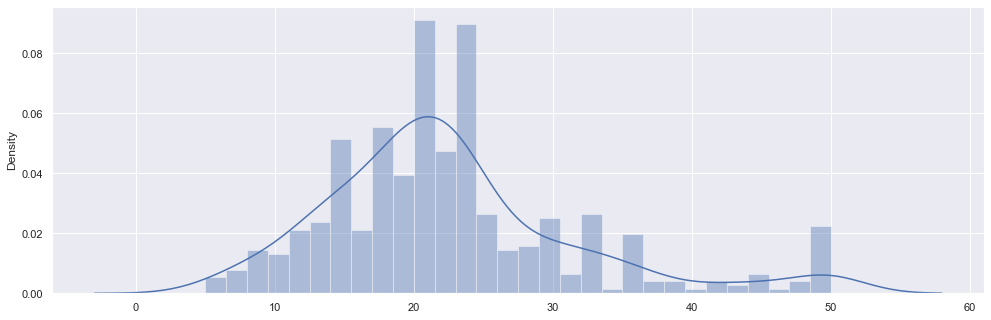

In [721]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
sns.distplot(y, bins=30)
plt.show()

In [722]:
corr=boston_df.corr()

In [723]:
boston_df.columns

Index(['crime', 'zone', 'non-retail', 'Charles_River', 'nitrogen_oxide',
       'rooms', 'age', 'distances', 'highways_accessibility', 'property_tax',
       'pupil_teacher_ratio', 'B', 'lower_status_population'],
      dtype='object')

<AxesSubplot:>

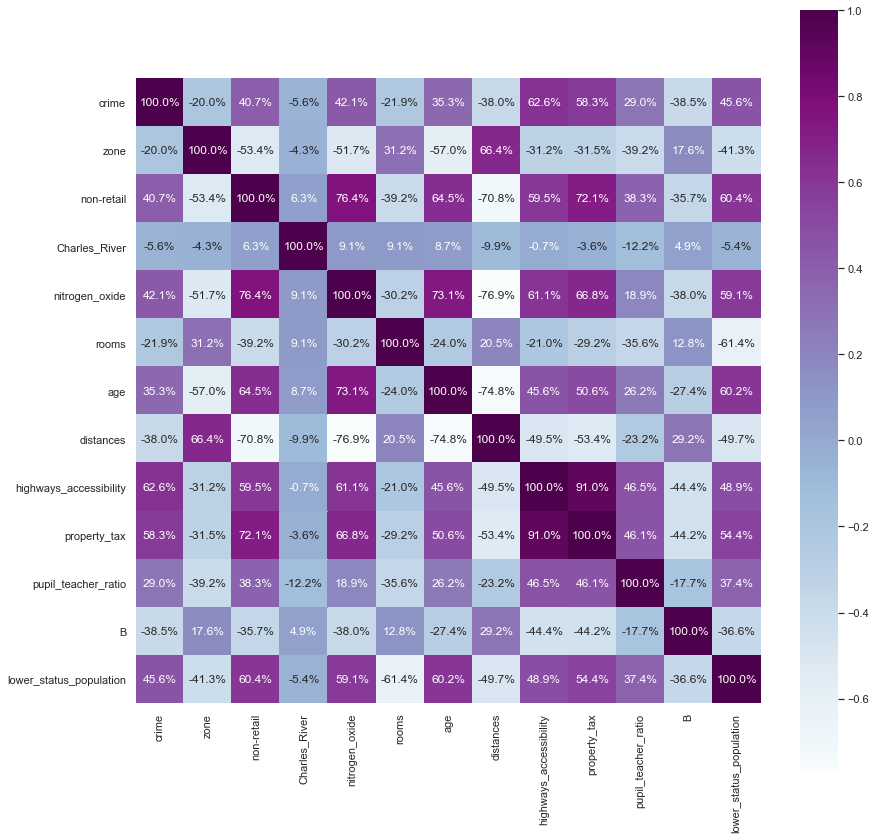

In [724]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square= True, fmt='.1%', annot=True, cmap='BuPu')

# Modelling

In [733]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier

In [726]:
X=boston_df
y=boston.target

In [727]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### linearregression model

In [728]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [729]:
y_pred1=LR.predict(X_train)

In [730]:
LR.score(X_train,y_train)

0.7168057552393374

## model explorations

In [731]:
y = np.round(y) #must to be int
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the columns
featureScores.columns = ['features','score'] 
featureScores

,features,score
0,crime,5503.817133
1,zone,5937.859414
2,non-retail,873.746270
3,Charles_River,59.080170
4,nitrogen_oxide,5.073299
5,rooms,21.981504
6,age,2424.308937
7,distances,163.919426
8,highways_accessibility,1445.257647
9,property_tax,14817.836927


In [732]:
#sort scores
featureScores.nlargest(10,'score')

,features,score
9,property_tax,14817.836927
1,zone,5937.859414
0,crime,5503.817133
11,B,3340.486412
6,age,2424.308937
8,highways_accessibility,1445.257647
12,lower_status_population,1430.549632
2,non-retail,873.746270
7,distances,163.919426
3,Charles_River,59.080170


'B' stands for 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

#### compare clissifiers

 the Extra Trees and Random Forest and comparing both of them in terms of results

In [654]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

for speed we might want to use extratrees depending on how much computing resources we have, since there is no oprimization process while choosing the nodes in extratees

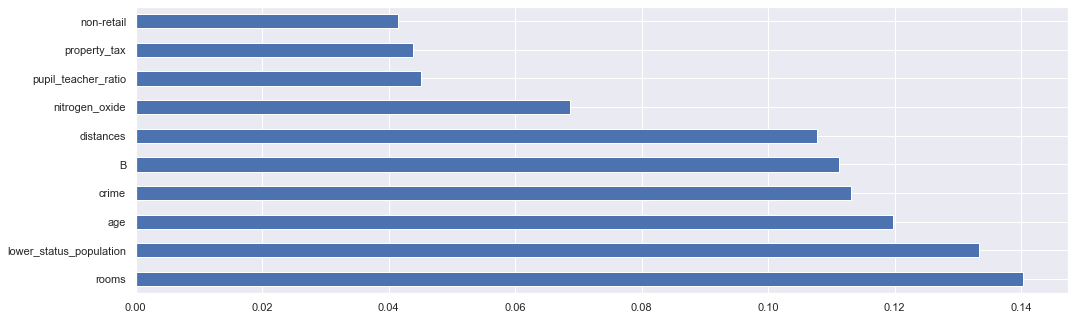

In [734]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## conclusion

##### in terms of data
it seems hoursing prices are implication of social status, because prices and lower status population are inversely proportional.
another finding is property taxes has ver low effect on prices.
it is expected the higher a house has rooms, the higher its price

##### about coding part
i learned many things, with my previous mentor i didn't realize the data i had chosen was not suitable for modeling.